In [2]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [3]:
import nltk

nltk.download('punkt')
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [4]:
from google.colab import files
upload = files.upload ()

Saving camille_lesoir_sample.zip to camille_lesoir_sample.zip


In [13]:
import zipfile
import os

os.makedirs("data/txt", exist_ok=True)

with zipfile.ZipFile("camille_lesoir_sample.zip", "r") as z:
    z.extractall("data/txt")

print(len(os.listdir("data/txt")))
os.listdir("data/txt")[:10]

1


['txt']

In [7]:
data_path = "data/txt/txt/"

In [8]:
DECADE = '1900'

In [12]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [14]:
# Exemple de fichiers
files[:5]

['KB_JB838_1900-01-02_01-00002.txt',
 'KB_JB838_1900-01-07_01-00007.txt',
 'KB_JB838_1900-01-08_01-00003.txt',
 'KB_JB838_1900-01-18_01-00008.txt',
 'KB_JB838_1900-01-19_01-00004.txt']

In [15]:
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

In [16]:
# Exemple de textes
texts[0][:400]

'La bretelle, sur les origines de laquelle le;- •pinions sont contradictoires, n’en remonte pa,> moins à une honorable antiquité. De tous temps, bien que sous des formes diverses, elle a servi à maintenir la culotte et, plus tard, le pantalon. Sous Louis-Philippe, elle eut même son heure de gloire. On la vit aux culottes-à-pont de la garde nationale, et le roi lui-méme, dans telles estampes recherc'

In [17]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

In [24]:
tfidf_vectors = vectorizer.fit_transform(texts)

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [25]:
# Détail de la matrice
tfidf_vectors

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 794850 stored elements and shape (1000, 3942)>

In [20]:
N_CLUSTERS = 5

In [21]:
km_model = KMeans(n_clusters=N_CLUSTERS)

In [26]:
clusters = km_model.fit_predict(tfidf_vectors)

In [29]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [30]:
pprint(dict(clustering))

{np.int32(0): ['KB_JB838_1900-01-02_01-00002.txt',
               'KB_JB838_1900-01-08_01-00003.txt',
               'KB_JB838_1900-01-28_01-00002.txt',
               'KB_JB838_1900-01-29_01-00003.txt',
               'KB_JB838_1900-02-09_01-00001.txt',
               'KB_JB838_1900-02-12_01-00001.txt',
               'KB_JB838_1900-02-13_01-00002.txt',
               'KB_JB838_1900-02-18_01-00002.txt',
               'KB_JB838_1900-02-22_01-00006.txt',
               'KB_JB838_1900-02-24_01-00005.txt',
               'KB_JB838_1900-02-25_01-00002.txt',
               'KB_JB838_1900-03-11_01-00006.txt',
               'KB_JB838_1900-03-21_01-00002.txt',
               'KB_JB838_1900-03-27_01-00001.txt',
               'KB_JB838_1900-03-28_01-00001.txt',
               'KB_JB838_1900-03-31_01-00002.txt',
               'KB_JB838_1900-04-23_01-00001.txt',
               'KB_JB838_1900-04-26_01-00005.txt',
               'KB_JB838_1900-04-30_01-00001.txt',
               'KB_JB838_1900-0

In [31]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [32]:
reduced_vectors[:10]

array([[-0.29857136,  0.18095573],
       [-0.16691282, -0.51878594],
       [-0.08309879, -0.10430948],
       [ 0.20122462, -0.26755281],
       [ 0.64209302,  0.24274446],
       [ 0.09429101, -0.21708681],
       [ 0.63892479,  0.26666368],
       [-0.31542677,  0.1732398 ],
       [ 0.02992611, -0.18759277],
       [-0.24411437, -0.10500994]])

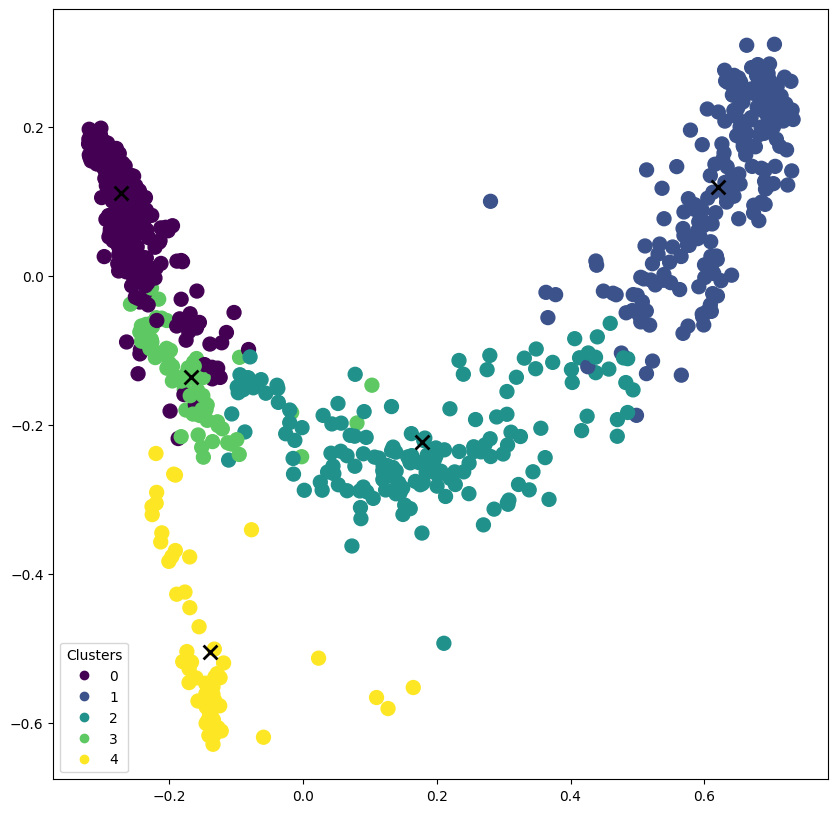

In [33]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

Word2Vec

In [34]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 6.9 MB/s eta 0:00:00


In [35]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 39.2 MB/s eta 0:00:00


In [36]:
from google.colab import files
uploaded = files.upload()


Saving sents1 (2).zip to sents1 (2).zip


In [37]:
import os
import zipfile

os.makedirs("data", exist_ok=True)


with zipfile.ZipFile("sents1 (2).zip", "r") as z:
    z.extractall("data")


os.listdir("data")


['sents1.txt', 'txt']

In [38]:
import os
os.rename ("data/sents1.txt", "data/sents.txt")
os.listdir("data")

['sents.txt', 'txt']

In [39]:
import sys

from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec

import nltk
from nltk.tokenize import wordpunct_tokenize
from unidecode import unidecode

In [41]:
class MySentences(object):
    """Tokenize and Lemmatize sentences"""
    def __init__(self, filename):
        self.filename = filename

    def __iter__(self):
        for line in open(self.filename, encoding='utf-8', errors="backslashreplace"):
            yield [unidecode(w.lower()) for w in wordpunct_tokenize(line)]

In [42]:
infile = "data/sents.txt"
sentences = MySentences(infile)

In [47]:
bigram_phrases = Phrases(sentences)

In [48]:
bigram_phraser = Phraser(phrases_model=bigram_phrases)

In [49]:
trigram_phrases = Phrases(bigram_phraser[sentences])

In [50]:
trigram_phraser = Phraser(phrases_model=trigram_phrases)

In [51]:
corpus = list(trigram_phraser[bigram_phraser[sentences]])

In [ ]:
print(corpus[:100])

[['mi', 'imnri', 'r', 'i', '<<', 'i', 'i', 'hmu', "'", 'i', '/', 'tx', "-'", 'l', ':', 'marche', 'tenu', 'hors', 'villa', ',', 'la', '9', '.'], ['--', 'u', 'a', 'ete', 'vaain', 'si', 'teicj', '>>', 'm', 'races', 'indigenes', 'de', 'fr', '.'], ['31', '<)', 'a', '5s', "'", 'k', '131', 'de', '.'], ['rasa', 'iichakdui', "'", 'te', ',', 'do', '(', 'r', '.', '3s0', 'h', '710', '.', 'taureaux', 'iallsenas', ',>', 'ia', 'u', '\\', '--', 'a', '--', ';', '0ii', '.'], ['hollandais', ',', 'dufr', '.'], ['0', '.'], ['--', 'a', '9', '.--', 'la', 'idto', '-', 'vachei', 'laitieres', ':', 'bn', 'vante', '1q', '.'], ['vendues', '3', '\\', 'au', 'prix', 'la', '410', 'a', '*', '<<', 'i', 'h', '\\;', 'genisses', ',', 'kl', '.'], ["'.", '9', '.'], ['i', 'l', '.', '2', 'i', '.', 'id', '.'], ['da', '370', 'i', '6lutr', '.'], ['marche', 'a', '<', 'u', 'porcs', '.'], ['--', 'categorie', 'de', 'lt', 'ilashtya', ':', "'", '237', 'on', 'vente', ';', 'vendus', '1', 'm', '.', 'do', "'", '2', 'i', '.--', 'a', ';:,', 

In [52]:
%%time
model = Word2Vec(
    corpus, # On passe le corpus de ngrams que nous venons de créer
    vector_size=32, # Le nombre de dimensions dans lesquelles le contexte des mots devra être réduit, aka. vector_size
    window=5, # La taille du "contexte", ici 5 mots avant et après le mot observé
    min_count=5, # On ignore les mots qui n'apparaissent pas au moins 5 fois dans le corpus
    workers=4, # Permet de paralléliser l'entraînement du modèle en 4 threads
    epochs=5 # Nombre d'itérations du réseau de neurones sur le jeu de données pour ajuster les paramètres avec la descente de gradient, aka. epochs.
)

CPU times: user 2min 37s, sys: 707 ms, total: 2min 37s
Wall time: 1min 34s


In [53]:
model2 = Word2Vec(
    corpus,
    vector_size=100,
    window=10,     # fenêtre plus large
    min_count=10,  # mots plus fréquents uniquement
    workers=4,
    epochs=5
)

print("Modèle 2 entraîné !")


Modèle 2 entraîné !


In [ ]:
outfile = "data/newspapers.model"
model.save(outfile)
print("Modèle sauvegardé dans :", outfile)


Modèle sauvegardé dans : data/newspapers.model


In [ ]:
model.wv.similarity("haut_fonctionnaire", "pays_voisins")


np.float32(0.72997546)

In [ ]:
model.wv.similarity("postulants", "des_candidatures")


np.float32(0.62182385)

In [ ]:
model.wv.similarity("des_cambrioleurs", "forte_recompense")


np.float32(0.59470093)

In [ ]:
model.wv.most_similar("haut_fonctionnaire", topn=10)


[('officier_superieur', 0.9159610271453857),
 ('fournisseur', 0.9114001393318176),
 ('comite_consultatif', 0.908254861831665),
 ('premier_prix', 0.9054479598999023),
 ('indien', 0.903849720954895),
 ('comite_directeur', 0.9012253880500793),
 ('ministro', 0.8998860716819763),
 ('requisitoire', 0.8996550440788269),
 ('trophee', 0.8979704976081848),
 ('arbitre', 0.895394504070282)]

In [ ]:
model.wv.most_similar("bon_mecanicien", topn=10)


[('appreteur', 0.9498963952064514),
 ('bon_cocher', 0.9458467960357666),
 ('1426', 0.9404904842376709),
 ('deml_-_ouvr', 0.9403098821640015),
 ('tres_capab', 0.9395273327827454),
 ('deml_-_ouv', 0.9374632239341736),
 ('3701', 0.9371772408485413),
 ('premieres_corsageres', 0.9361990690231323),
 ('4292', 0.9349383115768433),
 ('bues_ouvrieres', 0.934669554233551)]

In [ ]:
model.wv.most_similar("chemin_faisant", topn=10)


[('oublia', 0.9397861361503601),
 ('porta_la_main', 0.920792281627655),
 ('laissa_tomber', 0.9202989935874939),
 ('pressait', 0.9172995090484619),
 ('paraissait_avoir', 0.9164890646934509),
 ('remuait', 0.9147781729698181),
 ('positivement', 0.912463903427124),
 ('conservait', 0.912420928478241),
 ('empoisonne', 0.9094314575195312),
 ('suv', 0.9083940386772156)]